# Class activation map is an unsupervised way of doing object localization with accuracy near par with supervised methods

# following model trained on 300 images. fine tuned final few layers of VGG19

In [1]:
import numpy as np
from keras.models import Sequential, load_model, Model
from keras.preprocessing.image import ImageDataGenerator
from keras.layers import Dense
from keras.layers import Dropout
from keras.layers import Flatten
from keras.layers import GlobalAveragePooling2D
from keras.callbacks import TensorBoard
from keras.constraints import maxnorm
from keras.optimizers import SGD
from keras.layers.convolutional import Conv2D
from keras.layers.convolutional import MaxPooling2D
from keras.utils import np_utils

import cv2

import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

Using TensorFlow backend.


In [2]:
from CAM_custom_large_image import overlay_cam_large_image, overlay_multi_layered_cam_large_image, get_cam

### index 0 is blank space
### index 1 is gray matter 
### index 2 is white matter

In [3]:
CLASS_IDX_BLANK = 0
CLASS_IDX_GRAY = 1
CLASS_IDX_WHITE = 2

In [4]:
# load model
model = load_model('VGG19_trained.h5')

# Generating CAM on a large image

In [5]:
blank1 = plt.imread('data/all/train/blank/Bank3B (103).jpg')
blank2 = plt.imread('data/all/train/blank/Bank3B (104).jpg')
grey1 = plt.imread('data/all/train/gray/Gray (1006).jpg')
grey2 = plt.imread('data/all/train/gray/Gray (1007).jpg')
white1 = plt.imread('data/all/train/white/WhiteM1 (113).jpg')
white2 = plt.imread('data/all/train/white/WhiteM1 (114).jpg')

In [6]:
t1 = np.concatenate((blank1, white1, grey1),axis=1)
t2 = np.concatenate((grey2, blank2, white2),axis=1)
new_img = np.concatenate((t1, t2),axis=0)

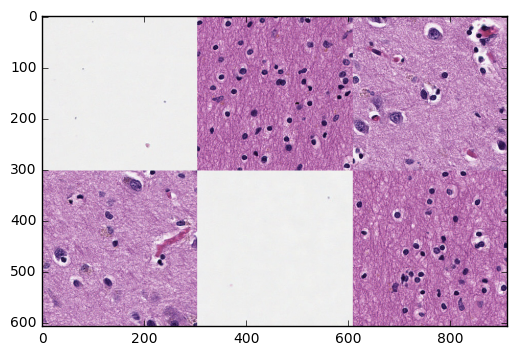

In [7]:
plt.imshow(new_img)

In [8]:
plt.imsave("multi_tiled_tissue.jpg", new_img)

## Generating Single Layer CAM's 

### 1. show which parts constitute gray matter

In [9]:
cam, avg_pred = overlay_cam_large_image(model, 304, ['blank','gray','white'], new_img, 'block5_conv4', CLASS_IDX_GRAY, cmap='seismic')

Analyzing......Complete


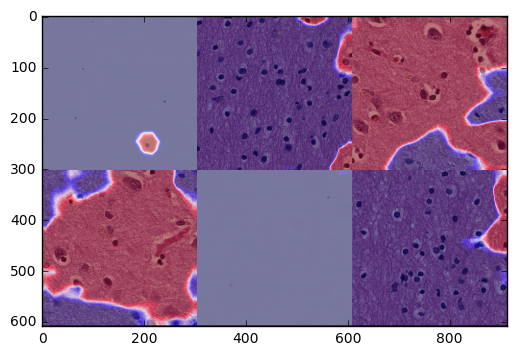

In [10]:
plt.imshow(cam)

In [11]:
avg_pred

{'blank': 0.33166129937977945,
 'gray': 0.3281485934154868,
 'white': 0.34019010877818801}

### 2. show which parts constitute white matter

Analyzing......Complete


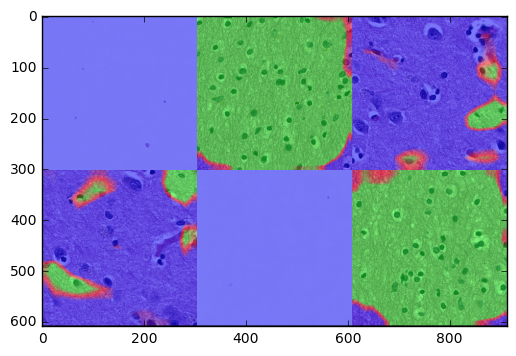

In [11]:
cam = overlay_cam_large_image(model, 304, new_img, 'block5_conv4', CLASS_IDX_WHITE, cmap='brg')
plt.imshow(cam)

### 3. show which parts constitute blank

Analyzing......Complete


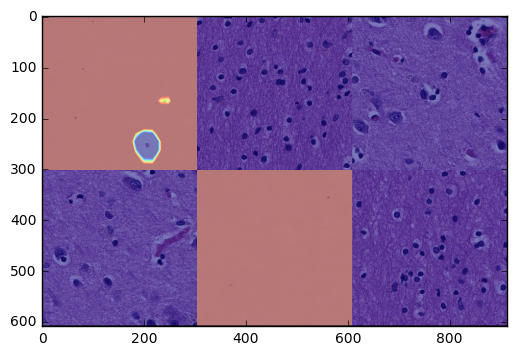

In [12]:
cam = overlay_cam_large_image(model, 304, new_img, 'block5_conv4', CLASS_IDX_BLANK)
plt.imshow(cam)

## Generating Multi Layer CAM's

In [14]:
import glob

g = glob.glob('data/all/train/gray/*.jpg')[:10]
w = glob.glob('data/all/train/white/*.jpg')[:10]
b = glob.glob('data/all/train/blank/*.jpg')[:10]


t1 = np.concatenate((plt.imread(b[0]), plt.imread(b[1]), plt.imread(b[2]), plt.imread(b[3]), plt.imread(w[0])),axis=1)
t2 = np.concatenate((plt.imread(w[1]), plt.imread(g[0]), plt.imread(w[2]), plt.imread(g[1]), plt.imread(g[2])),axis=1)
t3 = np.concatenate((plt.imread(w[3]), plt.imread(g[3]), plt.imread(w[4]), plt.imread(w[5]), plt.imread(g[5])),axis=1)
t4 = np.concatenate((plt.imread(g[8]), plt.imread(w[7]), plt.imread(g[7]), plt.imread(g[6]), plt.imread(w[6])),axis=1)
t5 = np.concatenate((plt.imread(g[9]), plt.imread(g[4]), plt.imread(w[8]), plt.imread(b[7]), plt.imread(b[8])),axis=1)
t6 = np.concatenate((plt.imread(w[9]), plt.imread(b[4]), plt.imread(b[5]), plt.imread(b[6]), plt.imread(b[9])),axis=1)
new_img = np.concatenate((t1, t2, t3, t4, t5, t6),axis=0)


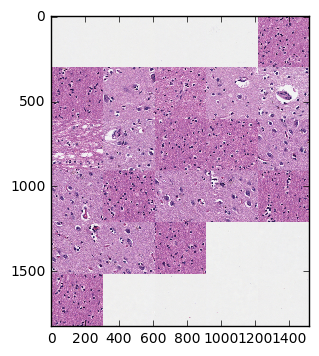

In [19]:
plt.imshow(new_img)

In [20]:
plt.imsave("multi_tiled_tissue.jpg", new_img)

### overlay prediction

In [17]:
text_color = (255,255,255)
classes = ['Blank', 'Gray Mat.', 'White Mat.']
a = 0.3

cam, _ = overlay_multi_layered_cam_large_image(model, 304, classes, new_img, 'block5_conv4', overlay_alpha=a, overlay_predictions=True, overlay_text_color=text_color)

Blank --> Red
Gray Mat. --> Blue
White Mat. --> Green
Analyzing..............................Complete


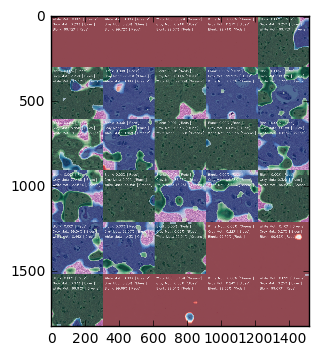

In [18]:
plt.imshow(cam)

In [21]:
plt.imsave("multi_tiled_tissue_CAM_PRED_OVERLAY.jpg", cam)

### average pred (no overlay)

In [22]:
text_color = (255,255,255)
classes = ['Blank space', 'Gray Matter', 'White Matter']
a = 0.3

cam, avg_pred = overlay_multi_layered_cam_large_image(model, 304, classes, new_img, 'block5_conv4', overlay_alpha=a)

Blank space --> Red
Gray Matter --> Blue
White Matter --> Green
Analyzing..............................Complete


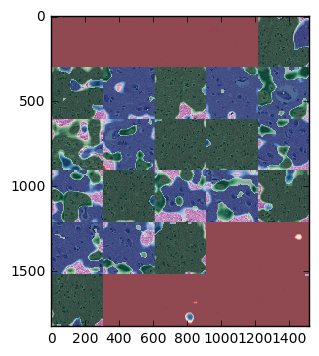

In [23]:
plt.imshow(cam)

In [24]:
avg_pred

{'Blank space': 0.33218771059195629,
 'Gray Matter': 0.32317501103874141,
 'White Matter': 0.3446372812555637}

In [26]:
plt.imsave("multi_tiled_tissue_CAM_NO_PRED_OVERLAY.jpg", cam)